In [130]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, LinearSVR, SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import pickle

# 2. Preparing data

In [2]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)

In [3]:
data_iris = datasets.load_iris(as_frame=True)

# 3. Classification

## Iris data set

In [92]:
Xi = data_iris['data'][['petal length (cm)', 'petal width (cm)']]
yi = (data_iris['target'] == 2).astype(np.uint8)
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.2)

In [93]:
# SVM model

svm_clf_iris_1 = Pipeline([("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),])
svm_clf_iris_1.fit(Xi_train, yi_train)

/root/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/root/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [94]:
yi_train_predict_1 = svm_clf_iris_1.predict(Xi_train)
yi_test_predict_1 = svm_clf_iris_1.predict(Xi_test)
# print(yi_test_predict)
# print(yi_test)
acc_iris_train_1 = accuracy_score(yi_train, yi_train_predict_1)
acc_iris_test_1 = accuracy_score(yi_test, yi_test_predict_1)

In [95]:
# SVM model with scaling

svm_clf_iris_2 = Pipeline([("scaler", StandardScaler()), 
                        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
                        ])
svm_clf_iris_2.fit(Xi_train, yi_train)

/root/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [96]:
yi_train_predict_2 = svm_clf_iris_2.predict(Xi_train)
yi_test_predict_2 = svm_clf_iris_2.predict(Xi_test)
# print(yi_test_predict)
# print(yi_test)
acc_iris_train_2 = accuracy_score(yi_train, yi_train_predict_2)
acc_iris_test_2 = accuracy_score(yi_test, yi_test_predict_2)

In [97]:
iris_acc = [acc_iris_train_1, acc_iris_test_1, acc_iris_train_2, acc_iris_test_2]
print(iris_acc)
with open('iris_acc.pkl', 'wb') as file:
  pickle.dump(iris_acc, file)

[0.95, 0.9666666666666667, 0.9583333333333334, 0.9666666666666667]


## Breast cancer data set

In [98]:
Xb = data_breast_cancer['data'][['mean area', 'mean smoothness']]
yb = data_breast_cancer['target'].astype(np.uint8)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=42)

In [99]:
# SVM model

svm_clf_bc_1 = Pipeline([("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),])
svm_clf_bc_1.fit(Xb_train, yb_train)

/root/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/root/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [100]:
yb_train_predict_1 = svm_clf_bc_1.predict(Xb_train)
yb_test_predict_1 = svm_clf_bc_1.predict(Xb_test)
# print(yb_test_predict_1)
# print(yb_test)
acc_bc_train_1 = accuracy_score(yb_train, yb_train_predict_1)
acc_bc_test_1 = accuracy_score(yb_test, yb_test_predict_1)

In [101]:
# SVM model with scaling

svm_clf_bc_2 = Pipeline([("scaler", StandardScaler()), 
                        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
                        ])
svm_clf_bc_2.fit(Xb_train, yb_train)

/root/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [102]:
yb_train_predict_2 = svm_clf_bc_2.predict(Xb_train)
yb_test_predict_2 = svm_clf_bc_2.predict(Xb_test)

acc_bc_train_2 = accuracy_score(yb_train, yb_train_predict_2)
acc_bc_test_2 = accuracy_score(yb_test, yb_test_predict_2)

In [103]:
bc_acc = [acc_bc_train_1, acc_bc_test_1, acc_bc_train_2, acc_bc_test_2]
print(bc_acc)
with open('bc_acc.pkl', 'wb') as file:
  pickle.dump(bc_acc, file)

[0.6285714285714286, 0.6228070175438597, 0.8923076923076924, 0.9298245614035088]


# 4. Preparing data for regression

<Axes: xlabel='x', ylabel='y'>

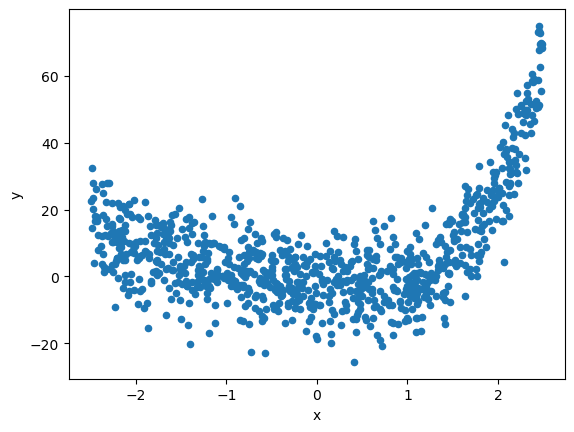

In [104]:
size = 900
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# 5. Regression

In [140]:
# Linear SVR
svm_reg = Pipeline([("scaler", StandardScaler()),
                     ("polynomial_features", PolynomialFeatures(degree=4)),
                     ("regressor", LinearSVR())])
svm_reg.fit(X_train, y_train)

/root/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial_features', PolynomialFeatures(degree=4)),
                ('regressor', LinearSVR())])

In [141]:
print(X_test[0], y_test[0])
print(svm_reg.predict([[2.08041798]]))

[2.08041798] [45.28225578]
[31.89429803]


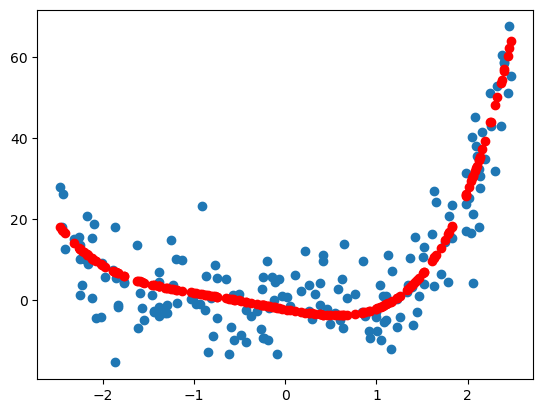

In [142]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, svm_reg.predict(X_test), color='red')
plt.show()

In [143]:
mse_train = mean_squared_error(y_train, svm_reg.predict(X_train))
mse_test = mean_squared_error(y_test, svm_reg.predict(X_test))
print(mse_train, mse_test)

62.44192702982404 60.046226485853225


In [144]:
# SVR
svm_poly_reg = SVR(kernel="poly", degree=4)
svm_poly_reg.fit(X_train, y_train)

/root/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(degree=4, kernel='poly')

In [145]:
mse_train_poly = mean_squared_error(y_train, svm_poly_reg.predict(X_train))
mse_test_poly = mean_squared_error(y_test, svm_poly_reg.predict(X_test))
print(mse_train_poly, mse_test_poly)

123.93523389120843 115.58869837357254


In [146]:
# Parameters for SVR
param_grid = {"C" : [0.1, 1, 10], "coef0" : [0.1, 1, 10]}

grid_search = GridSearchCV(SVR(kernel='poly', degree=4), param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X.reshape(-1,1), y)

params = grid_search.best_params_
print(params)

{'C': 1, 'coef0': 10}


In [147]:
# Better SVR
svm_svr_reg = SVR(kernel="poly", degree=4, C=params['C'], coef0=params['coef0'])
svm_svr_reg.fit(X_train, y_train)

/root/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, coef0=10, degree=4, kernel='poly')

In [148]:
mse_train_svr = mean_squared_error(y_train, svm_svr_reg.predict(X_train))
mse_test_svr = mean_squared_error(y_test, svm_svr_reg.predict(X_test))
print(mse_train_svr, mse_test_svr)

62.34526319080846 61.26920657794457


In [149]:
mse = [mse_train, mse_test, mse_train_svr, mse_test_svr]
print(mse)
with open("reg_mse.pkl", 'wb') as f:
    pickle.dump(mse, f)

[62.44192702982404, 60.046226485853225, 62.34526319080846, 61.26920657794457]
